In [10]:
#各種のインポート
import torch
from torch import nn,optim
from torch.utils.data import DataLoader, TensorDataset, Dataset
from torchvision import transforms
from torchinfo import summary #torchinfoはニューラルネットの中身を見れるのでおすすめ
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import os
import random

#乱数固定用の処理
seed = 10
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)

#データをPandasで読み込み
df = pd.read_csv("AirPassengers.csv")

#データを3行だけ表示
df.head(10)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


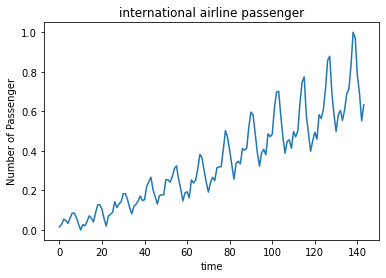

In [11]:
#Monthカラムは解析に不要なので排除
df = df.iloc[:,1].values
#乗客数の1次元データとする
df = df.reshape(-1,1)
df = df.astype("float32")
#ニューラルネットの入力データは0～1へ正規化する必要があるので乗客数を正規化する
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
df_scaled = scaler.fit_transform(df)

#正規化された乗客数の推移を図示して確認する
plt.plot(df_scaled)
plt.xlabel("time")
plt.ylabel("Number of Passenger")
plt.title("international airline passenger")
plt.show()